# Quiz 1
**Nama : Rochim Farul Noviyan**

**NRP : 05211840000108**

**Kelas : AB C**

Carilah dataset yang belum pernah digunakan pada perkuliahan.
Buatlah kode program Python dengan menggunakan data tersebut yang dapat :
1. Memvisualisasikan data
2. Mereduksi dimensi data
3. Mengaplikasikan KNN/regresi pada data

Catatan: 1 dataset dapat digunakan oleh maksimal 2 orang, namun kode program harus berbeda.

## Persiapan

Pada tahap ini saya mempersiapkan terlebih dahulu dataset dan pustaka atau *library* yang akan digunakan untuk menjawab kuis.

### Pustaka
Pustaka yang saya gunakan dalam mengerjakan quiz ini adalah pandas untuk mengelola dataset dan visualisasi, matplotlib untuk visualisasi dan scikit-learn untuk algoritma *machine learning*-nya.

Berikut saya melakukan *import* pustaka - pustaka tersebut. 

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Pandas saya import sepenuhnya. Matplotlib hanya saya gunakan pyplot saja. Untuk scikit-learn terdapat beberapa saja yang saya gunakan. `train_test_split` akan saya gunakan untuk memisahkan data untuk keperluan training dan testing. PCA adalah class untuk PCA. KNeighborsClassifier adalah class inti untuk KNN. `make_pipeline` dan `StandardScaler` akan digunakan untuk membuat pipeline pca. Terakhir ada `roc_auc_score` yang akan saya gunakan untuk menghitung akurasi dengan ROC AUC.

### Dataset

Dataset yang saya gunakan adalah Wine Quality yang saya dapatkan dari [repository milik uci](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), University of California Irvine. Dataset memiliki 2 variasi yaitu dataset untuk wine putih dan untuk wine merah. Kedua dataset tersebut erat kaitannya dengan wine hasil olahan anggur "Vinho Verde" varian merah dan putih dari Portugis.

In [380]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';', header=0)
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';', header=0)

Diatas saya memuat kedua dataset dengan bantuan pustaka pandas. Saya menyimpan varian putih ke dalam variabel dengan nama `white_wine` dan varian merah ke dalam variabel `red_wine`. Sebagai argumen tambahan saya menambahkan `sep=';'` yang maksudnya adalah menggunakan pembatas/separator `;` (titik koma) sebagai pembatas data antar kolom dalam satu baris. Berbeda dengan kebanyakan berkas csv yang pembatasnya menggunakan `,` (koma) untuk dataset ini menggunakan pembatas titik koma. Lalu argumen terakhir `header=0` memiliki maksud bahwa baris pertama (dalam ilmu komputer perhitungan dimulai dari 0) merupakan header atau nama kolom.

In [381]:
print(f'Jumlah baris data di dataset wine putih sebanyak : {len(white_wine.index)}')
print(f'Jumlah baris data di dataset wine merah sebanyak : {len(red_wine.index)}')

Jumlah baris data di dataset wine putih sebanyak : 4898
Jumlah baris data di dataset wine merah sebanyak : 1599


Diatas saya ingin mengetahui jumlah data yang terdapat pada kedua dataset. Dataset wine varian putih memiliki jumlah yang lebih banyak(4898 baris data) jika dibandingkan dengan dataset wine varian merah(1599 baris data). Pada quiz ini saya akan menggunakan dataset wine varian putih karena memiliki lebih banyak baris data jika dibandingkan dengan varian merah. Untuk lebih mengetahui tentang dataset saya menggunakan method `info()` dan `describe()` yang disediakan oleh pandas.

In [382]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [383]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Memvisualisasikan Data

Pada bagian ini saya ingin mengetahui persebaran `quality` dari wine putih dengan menghitung jumlah anggota dari setiap `quality`. Sebagai catatan kualitas disini dituliskan dalam bentuk skor dengan skala antara 0-10.  

In [384]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Potongan kode diatas adalah untuk menghitung jumlah anggota dari setiap `quality`. Berikut jika hasil perhitungan divisualisasikan dengan diagram batang horizontal:

Text(0.5, 0, 'Jumlah')

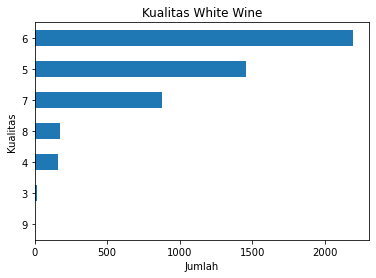

In [385]:
barh_plot = white_wine['quality'].value_counts().plot(kind='barh')
barh_plot.invert_yaxis()
barh_plot.set_title('Kualitas White Wine') 
barh_plot.set_ylabel('Kualitas')
barh_plot.set_xlabel('Jumlah')

Prosesnya adalah pengelompokan dan perhitungan anggota kelompok `quality` dilakukan dengan bantuan method `value_counts()`. Hasil perhitugan lalu di plotkan sebagai diagram batang horizontal oleh method `plot()`. Secara bawaan yang terbanyak akan diletakkan pada bagian bawah. Sehingga disini dilakukan pembalikan agar yang terbanyak berada diatas dengan method `invert_yaxis()`. Selanjutnya untuk melengkapi diagram, saya memberikan judul dan label untuk setiap sumbu.

Berdasarkan data tersebut dapat diketahui bahwa wine kebanyakan memiliki kualitas dengan skor 6. Lalu yang paling sedikit adalah wine kualitas terbaik dengan skor 9.

Visualisasi diatas juga dapat digambarkan dengan pie chart. Cukup dengan mengganti *kind* dari `barh` menjadi `pie` lalu menghapus label sumbu x. 

Text(0, 0.5, 'Kualitas')

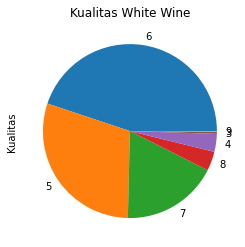

In [386]:
plt.figure() # Agar hasil visualisasi tidak overlap jika dijalankan diluar jupyter-notebook
pie_plot = white_wine['quality'].value_counts().plot(kind='pie')
pie_plot.set_title('Kualitas White Wine') 
pie_plot.set_ylabel('Kualitas')

Namun sayang hasilnya kurang rapi. Perbandingannya terlalu besar sehingga untuk kualitas 9 dan 3 yang anggotanya sangat sedikit jadi tidak terlihat dan saling tertumpuk.

Selanjutnya saya ingin mencoba mengetahui bagaimana hubungan antara kadar `alcohol` dan `quality` dari wine. Kali ini saya menggunakan boxplot untuk melihat hubungan diantara keduanya.

Text(0.5, 0.98, '')

<Figure size 432x288 with 0 Axes>

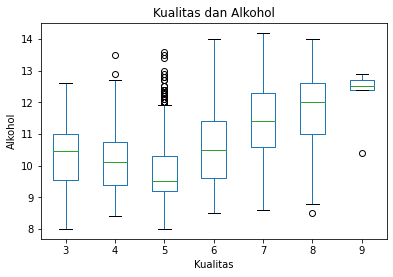

In [387]:
plt.figure() # Agar hasil visualisasi tidak overlap jika dijalankan diluar jupyter-notebook
box_plot = white_wine.boxplot(by='quality', column=['alcohol'], meanline=True, grid=False)
box_plot.set_title('Kualitas dan Alkohol')
box_plot.set_ylabel('Alkohol')
box_plot.set_xlabel('Kualitas')
plt.suptitle('')

Untuk membuat visualisasi boxplot yang pertama saya lakukan adalah memanggil `plt.figure()` untuk membuat kerangka visualisasi/figure baru (diperlukan terutama jika kode dijalankan di luar jupyter-notebook). Selanjutnya saya memanggil method `boxplot()` dengan beberapa argumen. Argumen pertama dan kedua yaitu `by='quality'` dan `column=['alcohol']` dimaksudkan untuk melakukan pengelompokkan `alcohol` berdasarkan `quality`. Selanjutnya ada argumen `meanline=True` untuk menampilkan garis rerata didalam box. Terakhir `grid=False` digunakan untuk menghilangkan garis kisi yang berada pada latar belakang. 

Sebagai pelengkap saya juga menambahkan label dan judul. Lalu terdapat juga `plt.suptitle('')` yang digunakan untuk menghapus judul/keterangan yang secara otomatis ditambahkan oleh pandas.

## Mereduksi dimensi data

Dalam rangka mereduksi dimensi data disini saya menggunakan PCA. Namun sebelum memasuki PCA perlu dilakukan persiapan terlebih dahulu.

In [388]:
random_state = 0

Sebelumnya saya mendefinisikan nilai random state yang akan saya pakai. Random state berguna dalam pengacakan yang akan saya lakukan nantinya. Secara bawaan nilai dari `random_state` jika tidak didefinisikan secara eksplisit adalah `None` dan ini akan berakibat pada pengacakan yang akan selalu berganti saat dijalankan. Sehingga disini saya menggunakan nilai 0 agar nantinya saat dijalankan dilain waktu akan selalu menghasilkan hasil yang sama. 

In [389]:
X = white_wine.iloc[:,0:11]
y = white_wine.iloc[:,-1]

Saya mendefinisikan 2 variabel X dan y. X disini akan menampung *features* sedangkan y akan menampung target klasifikasi. X menggunakan indeks `[:,0:11]` yang artinya saya mengambil seluruh baris untuk kolom dengan rentang 0 hingga 11 (seluruh kolom kecuali kolom terakhir/ kolom quality). y menggunakan indeks `[:,-1]` yang berarti mengambil seluruh baris untuk kolom hanya terakhir saja/ kolom quality. 

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

Selanjutnya saya membagi dataset untuk keperluan training dan testing. Perbandingan yang saya gunakan adalah 80:20, 80% data untuk data training dan 20% sisanya untuk testing. Saya menggunakan fungsi `train_test_split` untuk keperluan pembagian data tersebut. Argumen yang perlu saya masukkan adalah  X dan y, diikuti dengan besar data test yaitu 20%, lalu `stratify=y` yang maksudnya adalah agar hasil split memiliki proporsi nilai kualitas yang kurang lebih sama, argumen terakhir seperti yang saya jelaskan diatas untuk keperluan pengacakan.

In [391]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

pca.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=0))])

Disini reduksi dengan PCA dimulai. Disini dengan bantuan PCA saya mereduksi dimensi menjadi 2, seperti yang dapat dilihat pada bagian argumen `n_components`. Disini pengacakan dilakukan lagi dan saya menggunakan nilai random_state yang sama dengan sebelumnya yaitu 0. Berdasarkan dokumentasi yang saya baca PCA akan efektif jika dibatasi skalanya sehingga disini diperlukan `StandardScaler()` dalam pembuatan pipelinenya. Kemudian dilakukan proses fitting.

## Mengaplikasikan KNN/regresi pada data

Pada bagian ini saya akan mengaplikasikan KNN pada data yang telah direduksi dengan dan tanpa PCA

### KNN dengan PCA
Pada bagian ini saya aplikasi KNN pada data yang telah direduksi dimensinya. Saya menggunakan nilai k = 3, yang artinya klasifikasi akan dilakukan dengan melihat 3 tetangga data terdekat. 

In [392]:
k_value = 3
knn = KNeighborsClassifier(n_neighbors=k_value)

Diatas saya menggunakan nilai k = 3 sebagai dasar klasifikasi KNN.

In [393]:
knn.fit(pca.transform(X_train), y_train)
accuration = knn.score(pca.transform(X_test), y_test)

Lalu saya memulai proses fitting model KNN menggunakan data yang telah direduksi dimensinya oleh PCA. Setelah proses selesai saya melakukan tes akurasi model menggunakan data test yang telah disediakan dari hasil split.

In [394]:
print(f'Hasil akurasi jika menggunakan PCA : {round(accuration*100, 2)}%')

Hasil akurasi jika menggunakan PCA : 47.55%


Dapat diperhatikan diatas, bahwa hasil akurasi yang berhasil di dapatkan ialah sebesar 47.55%.

Selanjutnya berikut adalah visualisasi gabungan antara nilai yang didapatkan dari PCA dan KNN.

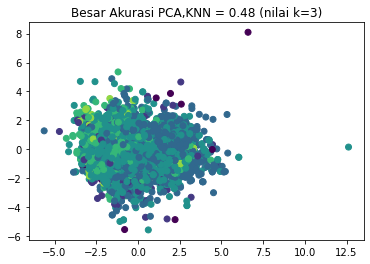

In [395]:
plt.figure()

X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

plt.title(f'Besar Akurasi PCA,KNN = {round(accuration, 2)} (nilai k={k_value})')
plt.show()

Visualisasi dilakukan dengan bantuan pustaka matplotlib. Pertama yaitu membuat kerangka visualisasi/figure dengan `plt.figure()`. Kemudian melakukan transformasi X dengan pca yang telah di fit pada langkah reduksi. Lalu divisualkan dalam bentuk scatter plot. Argumen scatter plot pertama `X_pca[:, 0]` memiliki maksud mengambil seluruh baris data untuk kolom pertama. Argumen kedua `X_pca[:, 1]` juga mengambil seluruh baris namun untuk kolom kedua. Selanjutnya nilai `c=y` mengatur agar pewarnaan mengikuti nilai y atau quality-nya. Sebelum menampilkan hasil visualisasi dengan `plt.show` terlebih dahulu saya memberikan judul visualisasi.

### KNN tanpa PCA

Pada bagian sebelumnya saya terlebih dahulu mereduksi dimensi dataset dengan PCA. Pada bagian ini saya melakukan klasifikasi tanpa mereduksi dataset terlebih dahulu.

In [396]:
knn_wo_red = KNeighborsClassifier(n_neighbors=k_value)
knn_wo_red.fit(X_train, y_train)
acc_wo_red = knn_wo_red.score(X_test, y_test)

Pertama saya membuat objek untuk knn dengan nilai k sama dengan sebelumnya, yaitu bernilai 3. Kemudian saya menggunakan data training yang tidak direduksi dengan pca. Setelah model dibuat saya menghitung akurasi dengan menggunakan data testing.

In [397]:
print(f'Hasil akurasi jika tidak menggunakan PCA : {round(acc_wo_red*100, 2)}%')

Hasil akurasi jika tidak menggunakan PCA : 48.27%


Hasilnya adalah akurasinya **lebih tinggi jika dibandingkan dengan yang telah direduksi dengan pca**. Namun perbedaanya tidak terlalu signifikan kurang lebih sekitar 1% saja.

### Uji Akurasi dengan ROC AUC

**ROC AUC (Receiver Operating Characteristic - Area Under Curve)** merupakan metode pengukuaran akurasi/kinerja klasifikasi dengan memanfaatkan nilai False Positive Rate dan True Positive Rate. Kedua nilai tersebut dapat didapatkan dengan rumus berikut
```
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
```
dengan

FP = nilai false positive  
TP = nilai true positive     
TN = nilai true negative  
FN = nilai false negative  

dari confusion matrix.

#### KNN dengan PCA    

Perhitungan skor ROC AUC pada model KNN dengan PCA dapat menggunakan model yang telah dibuat sebelumnya.

In [398]:
y_pred = knn.predict_proba(pca.transform(X_test))
score_roc_pca = roc_auc_score(y_test, y_pred, multi_class='ovr')

Pertama dengan menggunakan model `knn` yang telah dibuat dan difitting dengan data yang telah direduksi dimensinya, saya melakukan prediksi kemungkinan klasifikasi dari data testing. Kemudian saya menghitung nilai skor dengan menggunakan fungsi `roc_auc_score` yang diberikan argumen data testing hasil klasifikasi dan data prediksi hasil klasifikasifikasi. Karena target klasifikasi yang saya lakukan lebih dari dua kelas (*multi class*), perlu ditambahkan argumen ketiga `multi_class='ovr'` dimana maksud dari `ovr` adalah One-vs-Rest. Selain `ovr` terdapat juga nilai `ovo` yang berarti One-vs-One. Perbedaan keduanya adalah bagaimana pengelolaan data agar memungkinkan klasifikasi multi class dilakukan dengan ROC AUC yang seharusnya digunakan untuk klasifikasi binary (dua) class saja.

In [399]:
print(f'Skor ROC AUC jika menggunakan PCA : {round(score_roc_pca*100, 2)}%')

Skor ROC AUC jika menggunakan PCA : 61.95%


Skor yang didapatkan jika menggunakan PCA sebesar 61.95%.

#### Tanpa PCA    

Perhitungan skor ROC AUC pada model KNN tanpa PCA juga dapat memanfaatkan model yang telah dibuat sebelumnya.

In [400]:
y_pred_wo_pca = knn_wo_red.predict_proba(X_test)
score_roc_wo_pca = roc_auc_score(y_test, y_pred_wo_pca, multi_class='ovr')

Kurang lebih penjelasannya sama dengan pada bagian sebelumnya. Bedanya adalah disini menggunakan model knn tanpa pca, `knn_wo_red`, dan data tanpa reduksi.

In [401]:
print(f'Skor ROC AUC jika tidak menggunakan PCA : {round(score_roc_wo_pca*100, 2)}%')

Skor ROC AUC jika tidak menggunakan PCA : 63.29%


Skor yang didapatkan jika tanpa PCA sebesar 63.29%. **Lebih besar sekitar 1% dari yang menggunakan PCA.**

**Sekian, Terima Kasih**